### Analyse de la std Q1 23 France BL

In [321]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from os import *
from os.path import *
import numpy as np 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

#### Analyse Q1 23 sur septembre

In [340]:
#RECUPERATION PRIX TGP SUR LE MOIS DE aout

dates = pd.date_range('2022-09-01', '2022-09-30', freq='D').to_series().dt.dayofweek
dates = dates.loc[(dates != 5) & (dates != 6)]
dates = dates.index

from kdb import *
dates  = dates.astype(str)
df = []

for d in dates:
    data = kdb(date = d, index = "FRANCE_BL")[["Start Date", "Contract type", "TGP", "Markit Std", "Markit", "EEX","Ice", "Skylight"]]
    data = data.loc[(data["Contract type"] == "Month") &  (data["Start Date"] == "2023-01-01"), : ]
    df.append(data)

data = pd.concat(df)
data["Markit Delta"] = abs(data['TGP'] - data['Markit'])
data["Markit std %"] = (data['Markit Std'] / data['Markit']) * 100


Data retrieved from kdb for 2022-09-01
Data retrieved from kdb for 2022-09-02
Data retrieved from kdb for 2022-09-05
Data retrieved from kdb for 2022-09-06
Data retrieved from kdb for 2022-09-07
Data retrieved from kdb for 2022-09-08
Data retrieved from kdb for 2022-09-09
Data retrieved from kdb for 2022-09-12
Data retrieved from kdb for 2022-09-13
Data retrieved from kdb for 2022-09-14
Data retrieved from kdb for 2022-09-15
Data retrieved from kdb for 2022-09-16
Data retrieved from kdb for 2022-09-19
Data retrieved from kdb for 2022-09-20
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-23
Data retrieved from kdb for 2022-09-26
Data retrieved from kdb for 2022-09-27
Data retrieved from kdb for 2022-09-28
Data retrieved from kdb for 2022-09-29
Data retrieved from kdb for 2022-09-30


In [342]:
#data.to_csv("Data std 09.csv")


In [363]:
France_bl = pd.read_csv("Data std 09.csv", index_col=0)
France_bl["Markit Delta"] = France_bl["TGP"] - France_bl["Markit"]
France_bl["Ice Delta"] = France_bl["TGP"] - France_bl["Ice"]
France_bl["EEX Delta"] = France_bl["TGP"] - France_bl["EEX"]
France_bl["Skylight Delta"] = France_bl["TGP"] - France_bl["Skylight"]
France_bl["Markit Std 5 MA"] = France_bl["Markit Std"].rolling(5,min_periods=1).mean()

France_bl.head(10)

,Start Date,Contract type,TGP,Markit Std,Markit,EEX,Ice,Skylight,Markit Delta,Markit std %,Ice Delta,EEX Delta,Skylight Delta,Markit Std 5 MA
Date,,,,,,,,,,,,,,
2022-09-01,2023-01-01,Month,1175.300529,26.618639,1146.950984,1143.08,1203.81,1159.373239,28.349545,2.320818,-28.509471,32.220529,15.927290,26.618639
2022-09-02,2023-01-01,Month,1095.300529,26.204672,1118.910793,1159.08,1154.90,1122.306811,-23.610263,2.341980,-59.599471,-63.779471,-27.006282,26.411656
2022-09-05,2023-01-01,Month,1135.925822,NaN,NaN,1177.64,1121.49,1144.430557,NaN,NaN,14.435822,-41.714178,-8.504736,26.411656
2022-09-06,2023-01-01,Month,1060.925822,13.400330,1062.179653,1053.39,1074.98,1069.608523,-1.253832,1.261588,-14.054178,7.535822,-8.682702,22.074547
2022-09-07,2023-01-01,Month,986.000935,10.032694,996.512737,1003.75,1018.92,996.231813,-10.511802,1.006780,-32.919065,-17.749065,-10.230878,19.064084
2022-09-08,2023-01-01,Month,981.467250,8.124612,984.283124,986.38,1010.84,984.884886,-2.815874,0.825434,-29.372750,-4.912750,-3.417636,14.440577
2022-09-09,2023-01-01,Month,984.122685,10.156481,980.496947,980.19,1004.58,978.421918,3.625739,1.035850,-20.457315,3.932685,5.700768,10.428529
2022-09-12,2023-01-01,Month,981.828707,28.313147,997.617547,998.36,1002.17,1024.817446,-15.788840,2.838076,-20.341293,-16.531293,-42.988739,14.005453
2022-09-13,2023-01-01,Month,1022.845784,31.606903,1038.212209,1068.28,1111.02,1046.765210,-15.366426,3.044359,-88.174216,-45.434216,-23.919427,17.646767


In [365]:
markit8_9 = pd.read_csv(r"Data std 08 - 09.csv", index_col = 0)
markit8_9["Markit Std 5 MA"] = markit8_9["Markit Std"].rolling(5).mean()
markit8_9["Markit Std 5 MA"] = markit8_9["Markit Std"].rolling(10).mean()

In [348]:
#markit8_9 = pd.concat([markit8, markit9])
#markit8_9.to_csv("Data std 08 09.csv")

In [351]:
plt.figure(figsize = (30, 10), dpi = 650)
plt.bar(France_bl.index , France_bl["Markit Delta"], width = 0.4 ,  label = "Markit Delta", color = 'royalblue')
plt.plot(France_bl.index , France_bl["Markit Std"], label = " + Markit Std",  color = 'g')
plt.plot(France_bl.index , -France_bl["Markit Std"], label = " - Markit Std",  color = 'g')
plt.scatter(France_bl.index, France_bl["Ice Delta"], label = "Ice Delta",  color = 'dodgerblue', marker = 'o', s = 15)
plt.scatter(France_bl.index , France_bl["EEX Delta"], label = "EEX Delta",  color = 'crimson', marker = 'o', s = 15)
plt.scatter(France_bl.index, France_bl["Skylight Delta"], label = "Skylight Delta",  color = 'g', marker = 'o', s = 15)
plt.fill_between(France_bl.index, France_bl["Markit Std"], -France_bl["Markit Std"] , alpha = 0.1, color = 'g')
plt.axhline(y=0.2, color='r', linestyle=(0,(1,1)), label = " Current threshold")
plt.axhline(y=-0.2, color='r', linestyle=(0,(1,1)))
#plt.axhline(y = markit8["Markit Std"].mean(), label = "Oct Markit Std mean", color = "gold")
#plt.axhline(y = -markit["Markit Std"].mean(), color = "gold")

plt.axhline(y=France_bl["Markit Std"].mean(), color = 'royalblue', linestyle=(0,(1,1)), label = "Markit std mean")
plt.axhline(y=-France_bl["Markit Std"].mean(), color='royalblue', linestyle=(0,(1,1)))
plt.title("Q1 23 France BL over september")
plt.xlabel("Position Date")
plt.ylabel("Discrepancy €")
plt.legend();

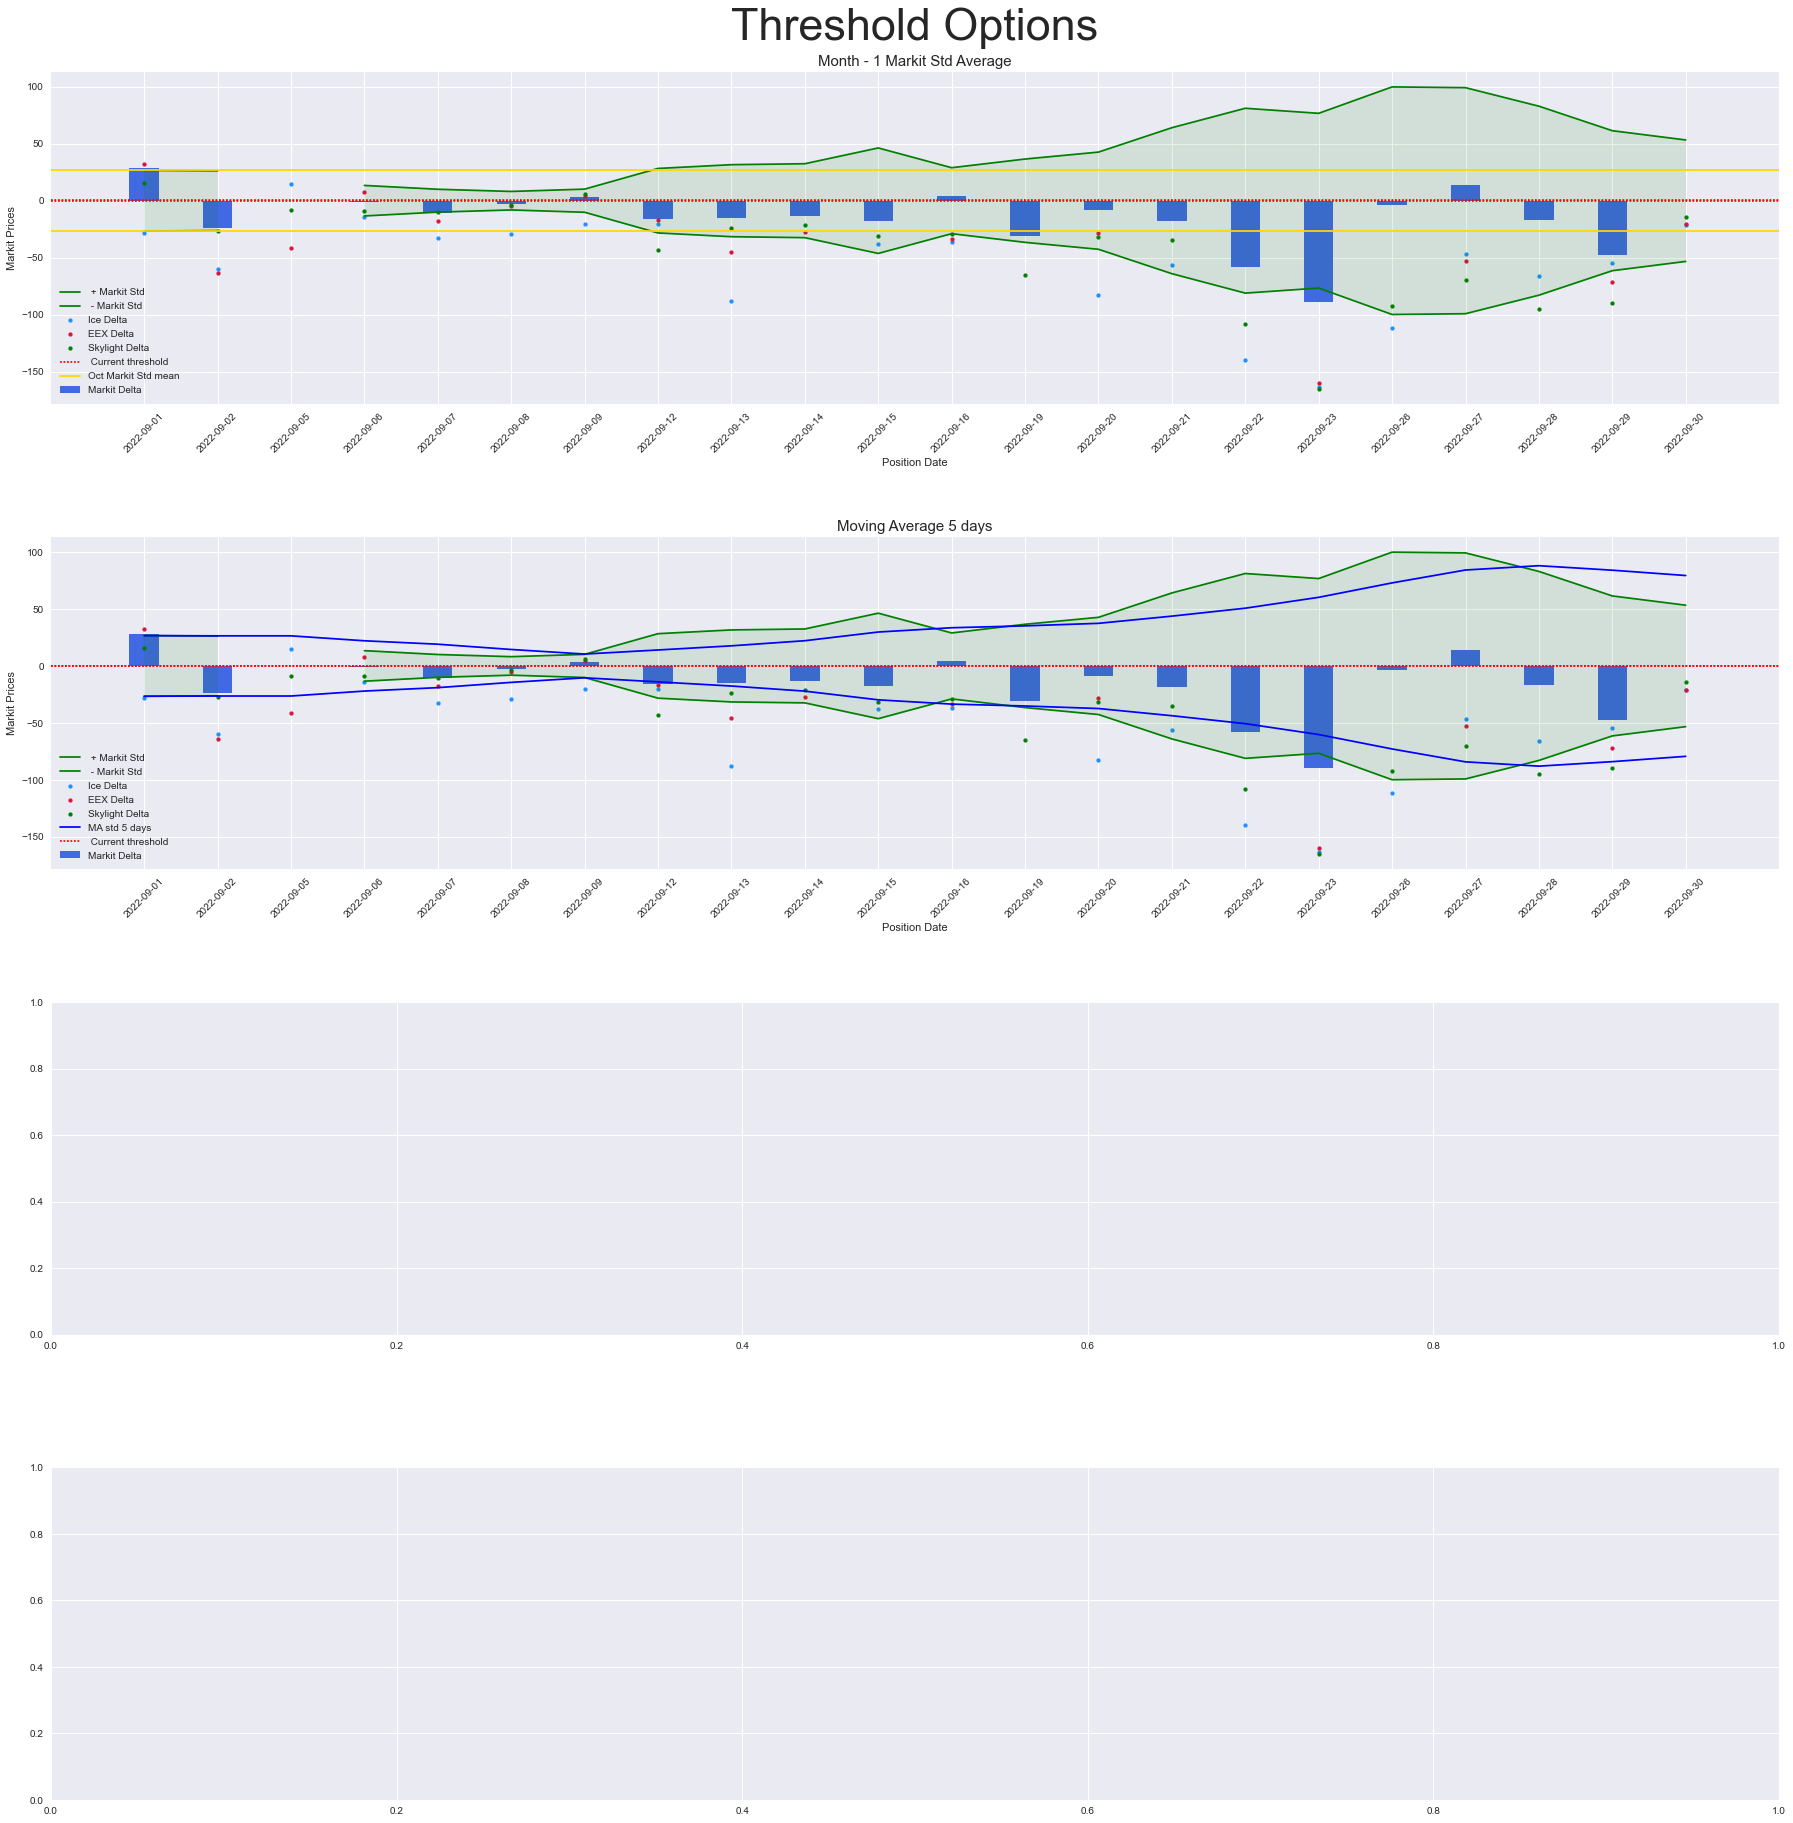

In [364]:
fig,ax = plt.subplots(4,1)
fig.set_figheight(30)
fig.set_figwidth(30)
plt.style.use('seaborn')


ax[0].bar(France_bl.index , France_bl["Markit Delta"], width = 0.4 ,  label = "Markit Delta", color = 'royalblue')
ax[0].plot(France_bl.index , France_bl["Markit Std"], label = " + Markit Std",  color = 'g')
ax[0].plot(France_bl.index , -France_bl["Markit Std"], label = " - Markit Std",  color = 'g')
ax[0].scatter(France_bl.index, France_bl["Ice Delta"], label = "Ice Delta",  color = 'dodgerblue', marker = 'o', s = 15)
ax[0].scatter(France_bl.index , France_bl["EEX Delta"], label = "EEX Delta",  color = 'crimson', marker = 'o', s = 15)
ax[0].scatter(France_bl.index, France_bl["Skylight Delta"], label = "Skylight Delta",  color = 'g', marker = 'o', s = 15)
ax[0].fill_between(France_bl.index, France_bl["Markit Std"], -France_bl["Markit Std"] , alpha = 0.1, color = 'g')
ax[0].axhline(y=0.2, color='r', linestyle=(0,(1,1)), label = " Current threshold")
ax[0].axhline(y=-0.2, color='r', linestyle=(0,(1,1)))
ax[0].axhline(y=markit["Markit Std"].mean(), label = "Oct Markit Std mean", color = "gold")
ax[0].axhline(y=-markit["Markit Std"].mean(), color = "gold")


ax[0].set_ylabel("Markit Prices")
ax[0].set_xlabel("Position Date")
ax[0].legend() #ax[0].legend(loc = "upper right")
ax[0].set_title("Month - 1 Markit Std Average", fontsize = 15)
ax[0].tick_params(axis='x', rotation=45)


ax[1].bar(France_bl.index , France_bl["Markit Delta"], width = 0.4 ,  label = "Markit Delta", color = 'royalblue')
ax[1].plot(France_bl.index , France_bl["Markit Std"], label = " + Markit Std",  color = 'g')
ax[1].plot(France_bl.index , -France_bl["Markit Std"], label = " - Markit Std",  color = 'g')
ax[1].scatter(France_bl.index, France_bl["Ice Delta"], label = "Ice Delta",  color = 'dodgerblue', marker = 'o', s = 15)
ax[1].scatter(France_bl.index , France_bl["EEX Delta"], label = "EEX Delta",  color = 'crimson', marker = 'o', s = 15)
ax[1].scatter(France_bl.index, France_bl["Skylight Delta"], label = "Skylight Delta",  color = 'g', marker = 'o', s = 15)
ax[1].fill_between(France_bl.index, France_bl["Markit Std"], -France_bl["Markit Std"] , alpha = 0.1, color = 'g')
ax[1].plot(France_bl.index , France_bl["Markit Std 5 MA"], label = "MA std 5 days",  color = 'blue')
ax[1].plot(France_bl.index , -France_bl["Markit Std 5 MA"], color = 'blue')
ax[1].axhline(y=0.2, color='r', linestyle=(0,(1,1)), label = " Current threshold")
ax[1].axhline(y=-0.2, color='r', linestyle=(0,(1,1)))

ax[1].set_ylabel("Markit Prices")
ax[1].set_xlabel("Position Date")
ax[1].legend() #ax[0].legend(loc = "upper right")
ax[1].set_title("Moving Average 5 days", fontsize = 15)
ax[1].tick_params(axis='x', rotation=45)


plt.subplots_adjust(left=0.1,
                    bottom=0.15,
                    right=0.9,
                    top=0.95,
                    wspace=0.4,
                    hspace=0.4)


plt.suptitle("Threshold Options", fontsize = 45);

#### Analyse std Q1 23 sur septembre

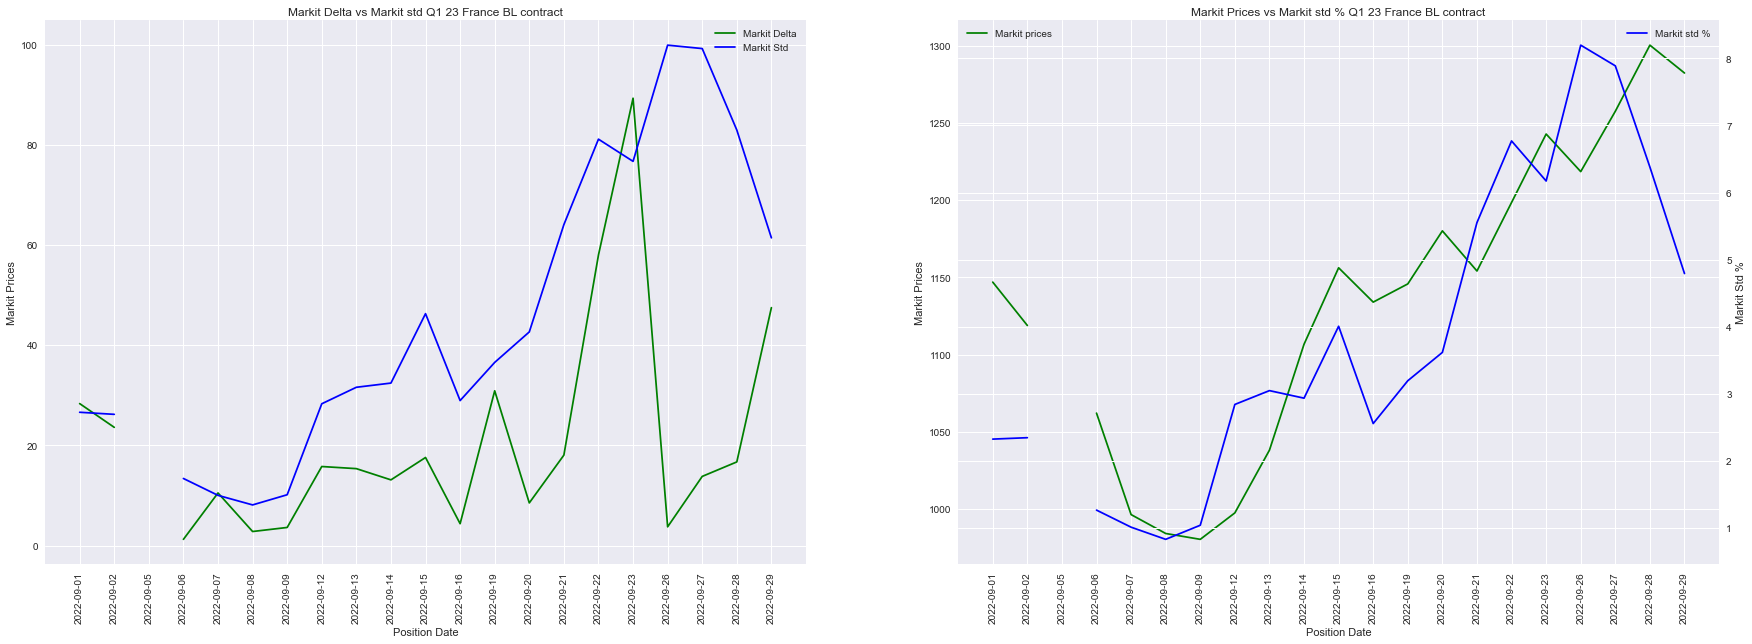

In [ ]:
data = pd.read_csv(r'Data\Data std 09.csv', index_col=0)

fig,ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(30)
plt.style.use('seaborn')


ax[0].plot(data.index, data["Markit Delta"], label = "Markit Delta", color = "green")
ax[0].plot(data.index, data["Markit Std"], label = "Markit Std", color = "blue")
ax[0].set_ylabel("Markit Prices")
ax[0].set_xlabel("Position Date")
ax[0].legend(loc = "upper right")
ax[0].set_title("Markit Delta vs Markit std Q1 23 France BL contract")
ax[0].tick_params(axis='x', rotation=90)

ax[1].plot(data.index, data["Markit"], label = "Markit prices", color = "green")
ax[1].set_ylabel("Markit Prices")
ax[1].set_xlabel("Position Date")
ax[1].legend(loc = "upper left")
ax2 = ax[1].twinx()
ax2.plot(data.index, data["Markit std %"], label = "Markit std %",  color = "blue")
ax2.legend(loc = "upper right")
ax[1].set_ylabel("Markit Prices")
ax2.set_ylabel("Markit Std %")
ax[1].set_title("Markit Prices vs Markit std % Q1 23 France BL contract")
ax[1].tick_params(axis='x', rotation=90)

plt.show()
